In [506]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [507]:
data = pd.read_csv('/data/member/twgoo/COVID-19/trajectory_analysis/oxford_globa.csv', index_col=0)

In [508]:
pre_country_code = set(data['CountryCode'])
print("Total number of countries :",len(pre_country_code))

Total number of countries : 40


In [509]:
data.describe()

,Days,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,DailyConfirmed
count,7240.000000,4060.000000,3967.000000,4267.000000,3597.000000,2310.000000,3459.000000,3572.000000,6913.000000,3070.000000,6922.000000,6879.000000,6903.000000,5313.000000,6902.000000,6914.000000,6895.000000,6891.000000,6.658000e+03,6609.000000
mean,91.000000,0.880419,0.746471,0.875713,0.838477,0.691631,0.613544,0.768944,0.548040,0.689902,0.348021,0.231110,0.039852,0.971265,0.419009,0.509257,0.130329,0.044373,5.332776e+04,1158.799667
std,52.253011,0.165140,0.181796,0.178679,0.161089,0.207881,0.167888,0.179689,0.426912,0.195815,0.426360,1.448816,0.557333,0.095773,0.331129,0.395879,0.979893,0.550077,1.916719e+05,4055.068217
min,1.000000,0.250000,0.250000,0.333333,0.200000,0.333333,0.250000,0.333333,0.000000,0.333333,0.000000,-0.124939,0.000000,0.333333,0.000000,0.000000,-1.522879,0.000000,0.000000e+00,-2461.000000
25%,46.000000,0.750000,0.500000,0.666667,0.800000,0.666667,0.500000,0.666667,0.000000,0.666667,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.250000e+00,0.000000
50%,91.000000,1.000000,0.750000,1.000000,0.800000,0.666667,0.500000,0.666667,0.600000,0.666667,0.000000,0.000000,0.000000,1.000000,0.333333,0.500000,0.000000,0.000000,4.685000e+03,69.000000
75%,136.000000,1.000000,0.750000,1.000000,1.000000,0.666667,0.750000,1.000000,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.666667,1.000000,0.000000,0.000000,2.965050e+04,533.000000
max,181.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,12.291724,11.921350,1.000000,1.000000,1.000000,11.384533,9.143015,2.510323e+06,54771.000000


# Data pre-processing
## Problems
1. Negative new confirmers 
2. Days start from 2020-01-01 for all countries 

In [510]:
for country in pre_country_code : 
    sub_data = data[data['CountryCode'] == country]
    
    others_data = data[data['CountryCode'] != country]
#     if min(sub_data['DailyConfirmed'].dropna()) < 0 : 
# #     if min(sub_data['DailyConfirmed'].dropna()) < 0 or max(sub_data['DailyConfirmed'].dropna()) > 680 :
#         data = data[data['CountryCode'] != country]
#     else :
    print(min(sub_data['DailyConfirmed']), max(sub_data['DailyConfirmed']) )
    first_day = 0 
    for i in range(len(sub_data)):
        if sub_data.iloc[i,-1] > 0 :
            first_day = i
            break
    sub_data = sub_data.iloc[first_day:]
    for i in range(len(sub_data)):
        sub_data.iloc[i,1] = i + 1
    data = pd.concat([sub_data, others_data], axis=0)

0.0 408.0
0.0 1426.0
0.0 1385.0
nan nan
0.0 611.0
-148.0 6557.0
0.0 1143.0
0.0 1401.0
0.0 6294.0
nan nan
0.0 11656.0
0.0 1169.0
0.0 6288.0
0.0 263.0
0.0 6825.0
nan nan
0.0 48529.0
0.0 899.0
nan nan
0.0 1390.0
0.0 390.0
-2461.0 11536.0
0.0 909.0
0.0 2319.0
0.0 15141.0
nan nan
0.0 5275.0
0.0 2760.0
0.0 234.0
-525.0 8719.0
0.0 296.0
nan nan
0.0 2889.0
-713.0 9181.0
0.0 54771.0
0.0 1063.0
0.0 1335.0
0.0 425.0
0.0 267.0
nan nan


In [511]:
data.describe()

,Days,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,DailyConfirmed
count,5457.000000,4032.000000,3947.000000,4263.000000,3593.000000,2310.000000,3455.000000,3571.000000,5130.000000,3070.000000,5139.000000,5096.000000,5120.000000,4801.000000,5119.000000,5131.000000,5112.000000,5108.000000,5.344000e+03,5308.000000
mean,70.162177,0.881324,0.747720,0.875909,0.838742,0.691631,0.613676,0.768972,0.718830,0.689902,0.468768,0.311971,0.051629,0.986045,0.537084,0.654161,0.173534,0.057517,6.644015e+04,1442.823474
std,41.868045,0.165353,0.181405,0.178648,0.160982,0.207881,0.167940,0.179706,0.352879,0.195815,0.433880,1.675831,0.637957,0.070149,0.285951,0.327599,1.129136,0.627196,2.119003e+05,4479.376494
min,1.000000,0.250000,0.250000,0.333333,0.200000,0.333333,0.250000,0.333333,0.000000,0.333333,0.000000,-0.124939,0.000000,0.333333,0.000000,0.000000,-1.522879,0.000000,1.000000e+00,-2461.000000
25%,35.000000,0.750000,0.500000,0.666667,0.800000,0.666667,0.500000,0.666667,0.600000,0.666667,0.000000,0.000000,0.000000,1.000000,0.333333,0.500000,0.000000,0.000000,1.055000e+03,19.000000
50%,69.000000,1.000000,0.750000,1.000000,0.800000,0.666667,0.500000,0.666667,0.800000,0.666667,0.500000,0.000000,0.000000,1.000000,0.666667,0.500000,0.000000,0.000000,9.147500e+03,169.500000
75%,103.000000,1.000000,0.875000,1.000000,1.000000,0.666667,0.750000,1.000000,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.666667,1.000000,0.000000,0.000000,4.308925e+04,789.250000
max,181.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,12.291724,11.921350,1.000000,1.000000,1.000000,11.384533,9.143015,2.510323e+06,54771.000000


In [532]:
country_code = set(data['CountryCode'])
print("Total number of countries :",len(country_code))
print("Filtered out countries because of negative new confirmers: ")
for country in pre_country_code:
    if country not in country_code :
        print(country)

Total number of countries : 40
Filtered out countries because of negative new confirmers: 


In [533]:
country_code

{'AFG',
 'AUS',
 'BEL',
 'BRA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'COL',
 'CZE',
 'DEU',
 'DNK',
 'DOM',
 'ECU',
 'ESP',
 'FIN',
 'GBR',
 'IDN',
 'IRL',
 'IRN',
 'ITA',
 'JPN',
 'KOR',
 'LUX',
 'MEX',
 'MYS',
 'NLD',
 'NOR',
 'PAK',
 'PAN',
 'PHL',
 'PRT',
 'RUS',
 'SAU',
 'SGP',
 'SRB',
 'SWE',
 'THA',
 'TUR',
 'USA'}

# GEE with a policy variable 
## Model strucutre 
- y ~ intercept + policy_variable 
- y ~ intercept + days + policy_variable
- y ~ intercept + days + log(days) + policy_variable

In [534]:
columns = list(data.columns)
for i ,column in enumerate(columns) : 
    columns[i] = column.replace(' ', '').replace('/','')
data.columns = columns

In [535]:
columns

['CountryCode',
 'Days',
 'C1_Schoolclosing',
 'C2_Workplaceclosing',
 'C3_Cancelpublicevents',
 'C4_Restrictionsongatherings',
 'C5_Closepublictransport',
 'C6_Stayathomerequirements',
 'C7_Restrictionsoninternalmovement',
 'C8_Internationaltravelcontrols',
 'E1_Incomesupport',
 'E2_Debtcontractrelief',
 'E3_Fiscalmeasures',
 'E4_Internationalsupport',
 'H1_Publicinformationcampaigns',
 'H2_Testingpolicy',
 'H3_Contacttracing',
 'H4_Emergencyinvestmentinhealthcare',
 'H5_Investmentinvaccines',
 'ConfirmedCases',
 'DailyConfirmed',
 'logDays']

In [536]:
# data = data[data['CountryCode']=='USA']
data = data[data['DailyConfirmed'] >= 0]

In [555]:
variables = data.columns[2:-3]

In [556]:
variables
data

,CountryCode,Days,C1_Schoolclosing,C2_Workplaceclosing,C3_Cancelpublicevents,C4_Restrictionsongatherings,C5_Closepublictransport,C6_Stayathomerequirements,C7_Restrictionsoninternalmovement,C8_Internationaltravelcontrols,...,E3_Fiscalmeasures,E4_Internationalsupport,H1_Publicinformationcampaigns,H2_Testingpolicy,H3_Contacttracing,H4_Emergencyinvestmentinhealthcare,H5_Investmentinvaccines,ConfirmedCases,DailyConfirmed,logDays
5675,PRT,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,4.0,2.0,0.000000
5676,PRT,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,5.0,1.0,0.693147
5677,PRT,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,9.0,4.0,1.098612
5678,PRT,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,13.0,4.0,1.386294
5679,PRT,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,21.0,8.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,CZE,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,10650.0,89.0,4.744932
1806,CZE,116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,10777.0,127.0,4.753590
1807,CZE,117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,10870.0,93.0,4.762174
1808,CZE,118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,11038.0,168.0,4.770685


Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.90

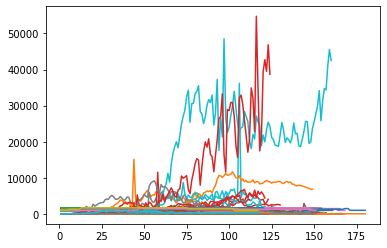

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:09
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept          

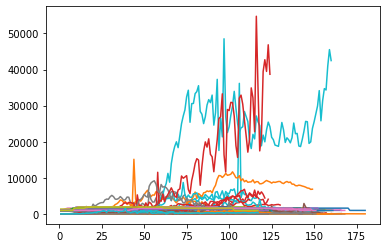

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:09
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

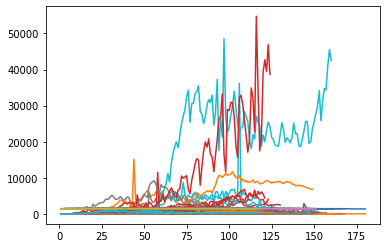

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:10
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Int

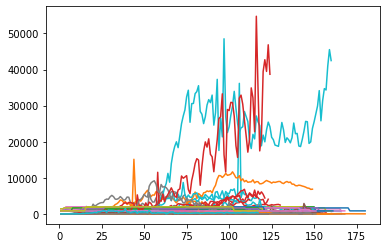

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:10
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

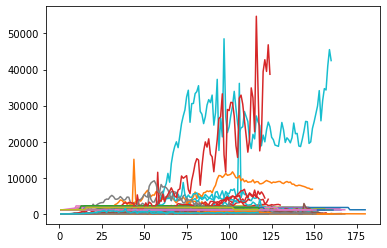

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:10
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Interce

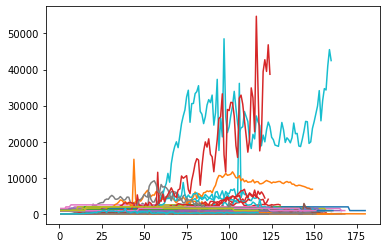

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:11
                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

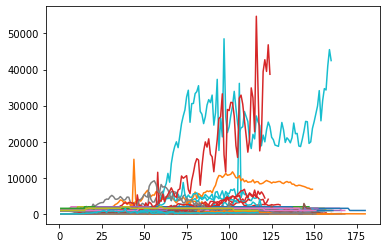

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:11
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

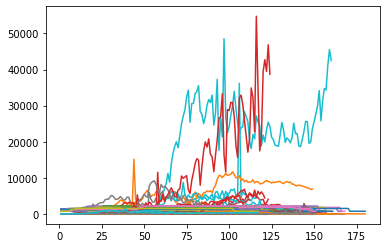

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.86

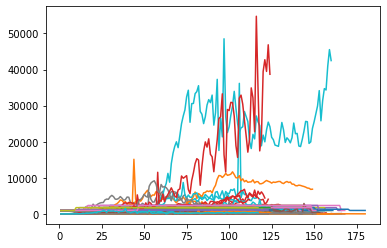

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:12
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

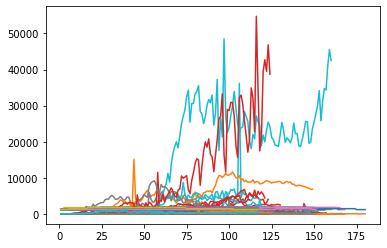

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7

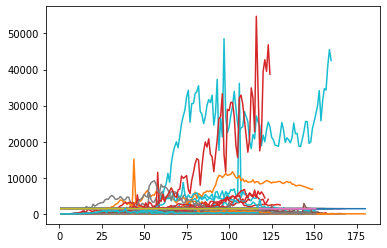

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:12
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

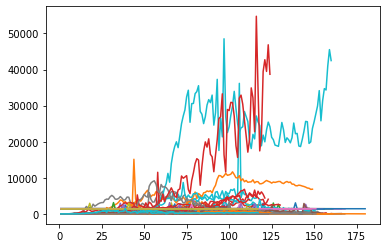

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:13
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

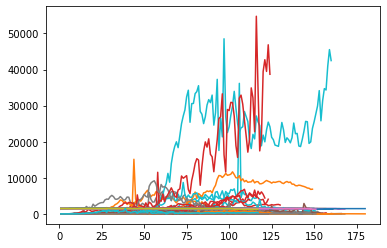

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:13
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.31

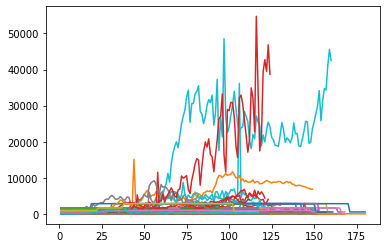

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:14
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7

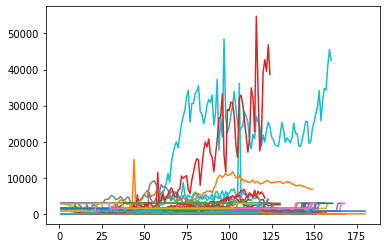

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:14
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

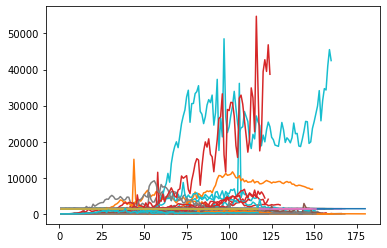

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:14
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

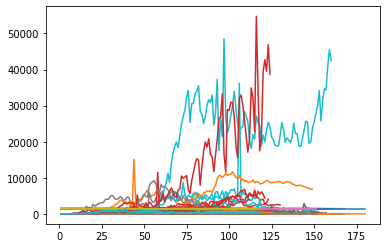

In [557]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()

variable_dict = {}

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
    sub_data = sub_data.fillna(0)
    print("Removing rows by NA value")
    print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    try : 
        mod = smf.gee("DailyConfirmed ~  "+variable , "CountryCode", sub_data , cov_struct = ind, family = fam)
        res = mod.fit()
        country_code = set(sub_data['CountryCode'])

        pval = res.pvalues[1]
        coef = res.params[1]
        variable_dict[variable] = {'coef':coef, 'pval':pval}
        print(res.summary())
        for country in country_code :
            predict_country = sub_data[sub_data['CountryCode']==country]
            predicted = res.predict(predict_country)
            plt.plot(predict_country['Days'], predicted, '-')
            plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
        plt.show()
    except:
        print("Failed to fit the model using", variable)

In [558]:
simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose().sort_values(by=['pval'])
simple_marker_result.to_csv('simple_marker_GEE_result.csv',)
simple_marker_result

,coef,pval
C7_Restrictionsoninternalmovement,0.734231,0.001714
C6_Stayathomerequirements,0.999596,0.002192
C4_Restrictionsongatherings,0.844710,0.002215
H3_Contacttracing,-1.317245,0.017056
C8_Internationaltravelcontrols,0.897051,0.034356
C2_Workplaceclosing,0.668575,0.037881
C5_Closepublictransport,0.654747,0.039889
E1_Incomesupport,0.890892,0.046901
C1_Schoolclosing,0.528542,0.050254
H2_Testingpolicy,1.635173,0.133745


Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:15
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.46

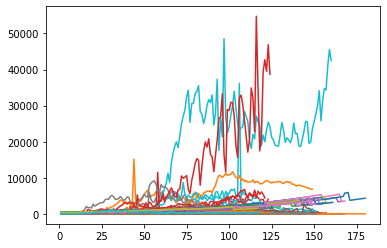

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:15
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept          

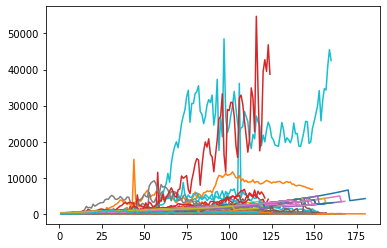

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:16
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

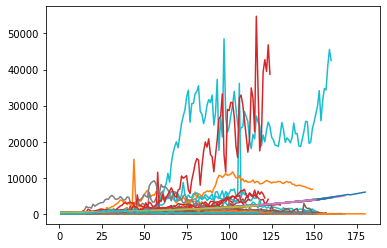

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Int

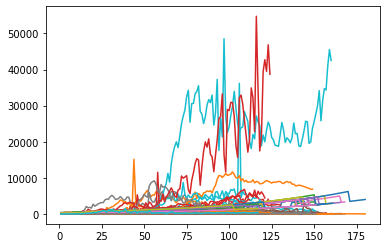

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:17
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

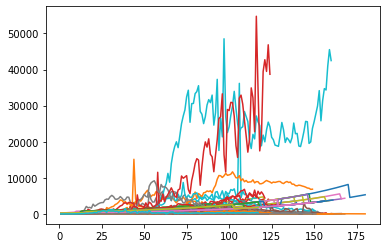

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:17
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Interce

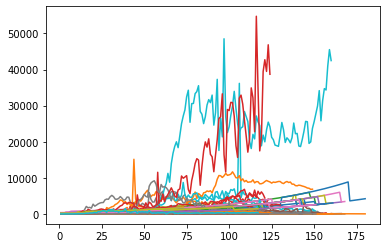

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:17
                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

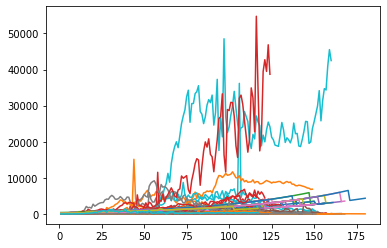

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:18
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

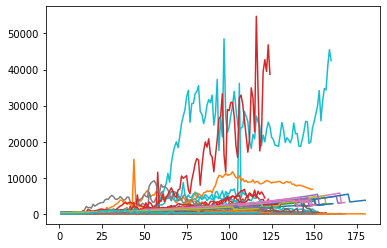

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:18
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.88

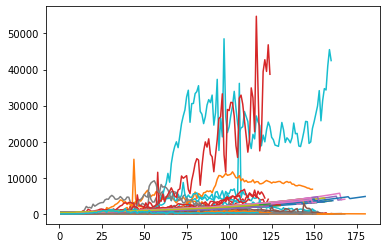

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:19
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

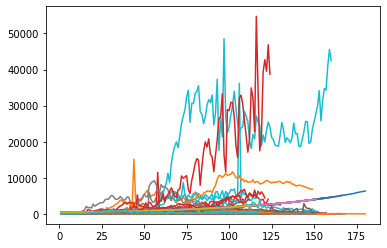

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:19
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5

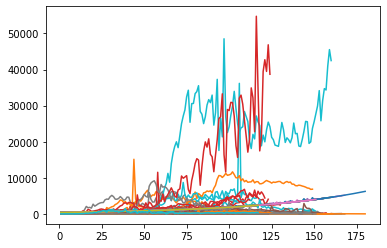

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:19
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

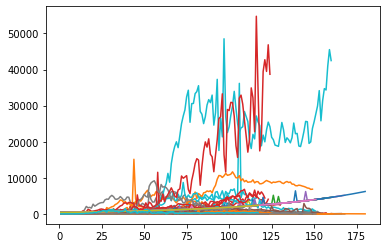

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:20
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

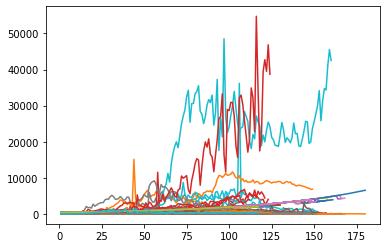

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:21
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.51

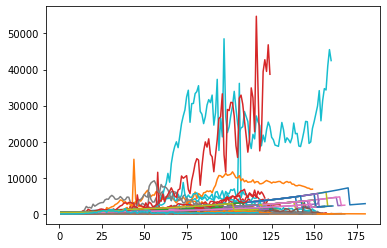

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:21
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6

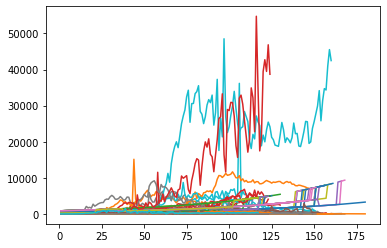

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:22
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

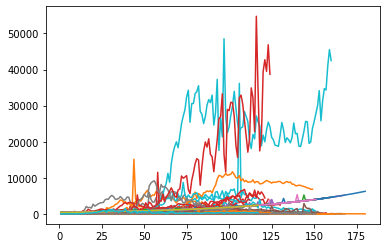

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:22
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

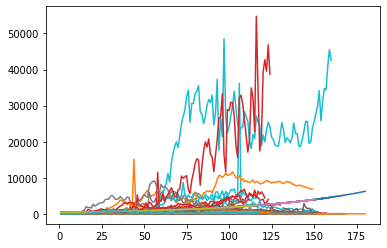

In [559]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()

variable_dict = {}

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
    sub_data = sub_data.fillna(0)
    print("Removing rows by NA value")
    print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    try : 

        mod = smf.gee("DailyConfirmed ~  Days + "+variable , "CountryCode", sub_data , cov_struct = ind, family = fam)
        res = mod.fit()
        country_code = set(sub_data['CountryCode'])

        pval = res.pvalues[1]
        coef = res.params[1]
        variable_dict[variable] = {'coef':coef, 'pval':pval}
        print(res.summary())
        for country in country_code :
            predict_country = sub_data[sub_data['CountryCode']==country]
            predicted = res.predict(predict_country)
            plt.plot(predict_country['Days'], predicted, '-')
            plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
        plt.show()
    except:
        print("Failed to fit the model using", variable)

In [560]:
simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose().sort_values(by=['pval'])
simple_marker_result.to_csv('simple_marker_with_days_GEE_result.csv',)
simple_marker_result

,coef,pval
H2_Testingpolicy,0.013561,0.000007
C3_Cancelpublicevents,0.015298,0.000013
C5_Closepublictransport,0.016883,0.000018
E3_Fiscalmeasures,0.015238,0.000033
H5_Investmentinvaccines,0.015216,0.000034
C1_Schoolclosing,0.016193,0.000036
E4_Internationalsupport,0.015209,0.000036
H4_Emergencyinvestmentinhealthcare,0.015306,0.000036
H3_Contacttracing,0.014276,0.000044
C6_Stayathomerequirements,0.017013,0.000067


Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:22
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.03

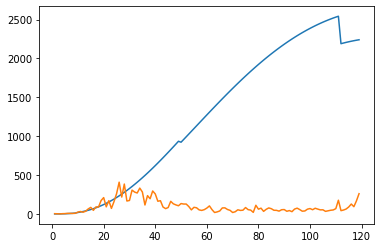

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept          

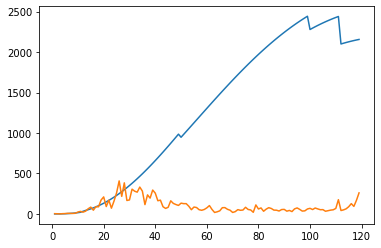

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

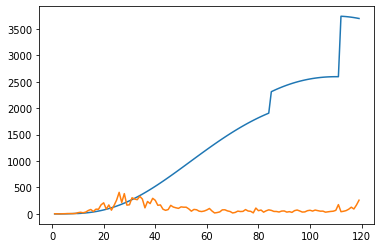

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Int

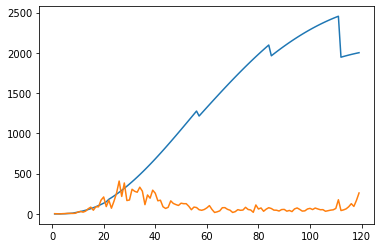

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

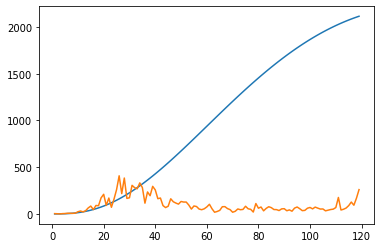

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Interce

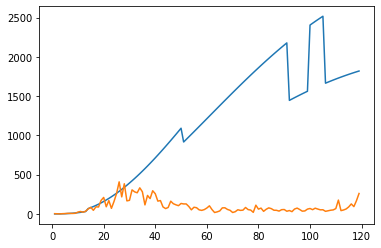

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

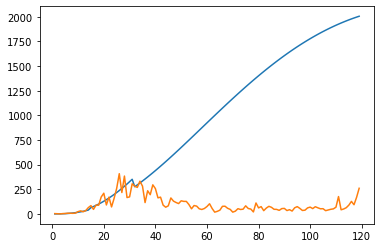

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

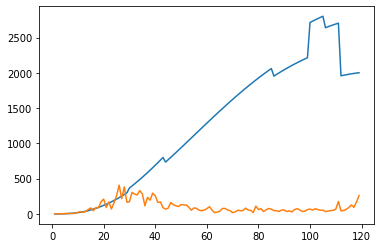

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.26

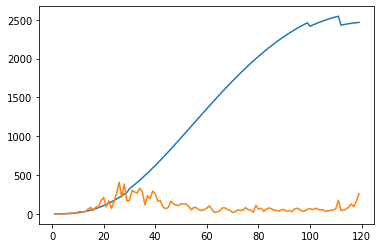

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

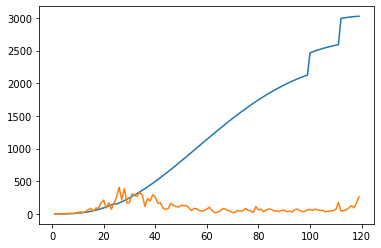

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4

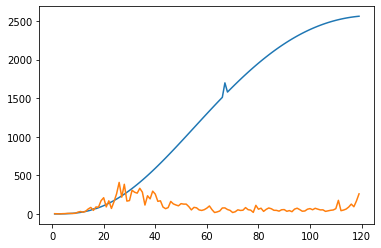

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

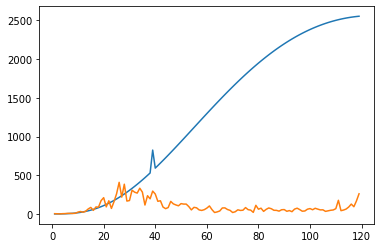

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

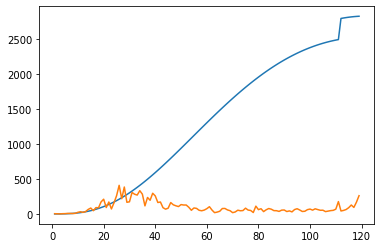

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.59

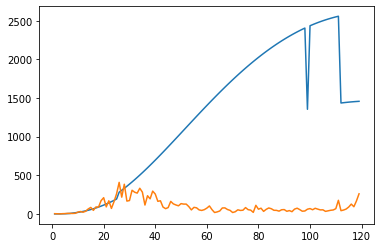

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     3
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4

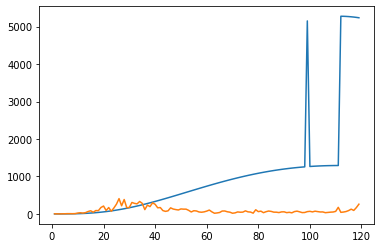

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

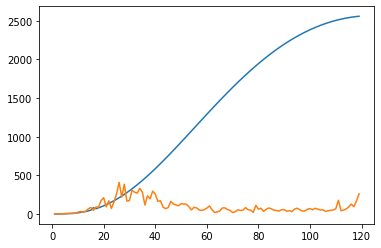

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

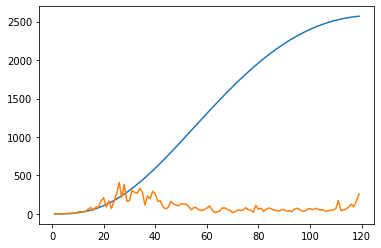

In [561]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()

variable_dict = {}

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
    sub_data = sub_data.fillna(0)
    sub_data['logDays'] = np.log(sub_data['Days'])
    print("Removing rows by NA value")
    print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    try:
        mod = smf.gee("DailyConfirmed ~  Days + logDays + "+variable , "CountryCode", sub_data , cov_struct = ind, family = fam)
        res = mod.fit()
        country_code = list(set(sub_data['CountryCode']))

        pval = res.pvalues[1]
        coef = res.params[1]
        variable_dict[variable] = {'coef':coef, 'pval':pval}
        print(res.summary())
        for country in country_code[:1] :
            predict_country = sub_data[sub_data['CountryCode']==country]
            predicted = res.predict(predict_country)
            plt.plot(predict_country['Days'], predicted, '-')
            plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
        plt.show()
    except:
        print("Failed to fit the model using", variable)

In [562]:
simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose().sort_values(by=['pval'])
simple_marker_result.to_csv('simple_marker_with_days_log_GEE_result.csv',)
simple_marker_result

,coef,pval
H3_Contacttracing,-0.031698,0.026430
E2_Debtcontractrelief,-0.028157,0.033452
C3_Cancelpublicevents,-0.034428,0.041177
E3_Fiscalmeasures,-0.025702,0.042808
H5_Investmentinvaccines,-0.025718,0.043156
H4_Emergencyinvestmentinhealthcare,-0.025721,0.043469
E4_Internationalsupport,-0.025611,0.045200
E1_Incomesupport,-0.025201,0.057421
C5_Closepublictransport,-0.020245,0.086978
H1_Publicinformationcampaigns,-0.026689,0.094348


Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:25:51
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

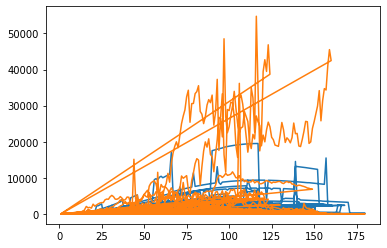

In [527]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()

variable_dict = {}

# for variable in variables:
#     sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
data = data.fillna(0)
data['logDays'] = np.log(data['Days'])
print("Removing rows by NA value")
print("No. of removed rows:", len(data['Days'])-len(data['Days']))
try:
    mod = smf.gee("DailyConfirmed ~  Days + logDays + "+ ' + '.join(variables[:4]) + ' + ' + ' + '.join(variables[5:]) , "CountryCode", data , cov_struct = ind, family = fam)
    res = mod.fit()
#         country_code = list(set(data['CountryCode']))

    pval = res.pvalues[1]
    coef = res.params[1]
    variable_dict[variable] = {'coef':coef, 'pval':pval, 'no.of countries':len(country_code)}
    print(res.summary())
#         for country in country_code[:1] :
    predict_country = data
    predicted = res.predict(predict_country)
    plt.plot(predict_country['Days'], predicted, '-')
    plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
    plt.show()
except Exception as e:
    print(e)
    print("Failed to fit the model using", variable)

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                  161
Model:                                 GEE   No. clusters:                        1
Method:                        Generalized   Min. cluster size:                 161
                      Estimating Equations   Max. cluster size:                 161
Family:                            Poisson   Mean cluster size:               161.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         02:42:49
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1852: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_robust))
/home/twgoo/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/twgoo/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/twgoo/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


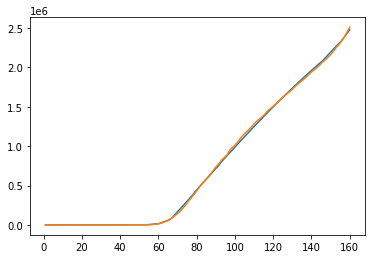

In [429]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()

variable_dict = {}

# for variable in variables:
#     sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
data = data.fillna(0)
data['logDays'] = np.log(data['Days'])
print("Removing rows by NA value")
print("No. of removed rows:", len(data['Days'])-len(data['Days']))
try:
    mod = smf.gee("DailyConfirmed ~  Days + logDays + "+ ' + '.join(variables[:4]) + ' + ' + ' + '.join(variables[5:]) , "CountryCode", data , cov_struct = ind, family = fam)
    res = mod.fit()
#         country_code = list(set(data['CountryCode']))

    pval = res.pvalues[1]
    coef = res.params[1]
    variable_dict[variable] = {'coef':coef, 'pval':pval, 'no.of countries':len(country_code)}
    print(res.summary())
#         for country in country_code[:1] :
    predict_country = data
    predicted = res.predict(predict_country)
    cumulative = np.cumsum(predicted)
    plt.plot(predict_country['Days'][:-1], cumulative[:-1], '-')
    plt.plot(predict_country['Days'][:-1], predict_country['ConfirmedCases'][:-1], '-')
    plt.show()
except Exception as e:
    print(e)
    print("Failed to fit the model using", variable)

,coef,pval,no.of countries
H3_Contacttracing,-0.031698,0.026430,40.0
E2_Debtcontractrelief,-0.028157,0.033452,40.0
C3_Cancelpublicevents,-0.034428,0.041177,40.0
E3_Fiscalmeasures,-0.025702,0.042808,40.0
H5_Investmentinvaccines,-0.025718,0.043156,40.0
H4_Emergencyinvestmentinhealthcare,-0.025721,0.043469,40.0
E4_Internationalsupport,-0.025611,0.045200,40.0
E1_Incomesupport,-0.025201,0.057421,40.0
C5_Closepublictransport,-0.020245,0.086978,40.0
H1_Publicinformationcampaigns,-0.026689,0.094348,40.0


                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                  458
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                 150
                      Estimating Equations   Max. cluster size:                 157
Family:                            Poisson   Mean cluster size:               152.7
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Wed, 01 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         15:24:42
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -8.3165     

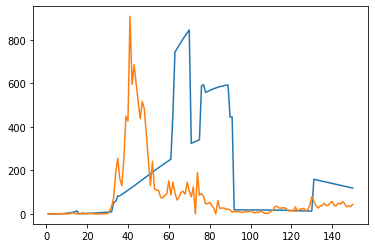

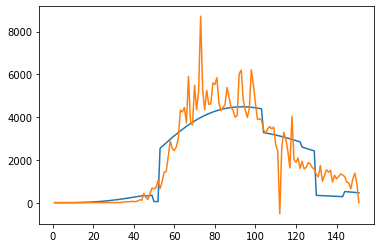

In [97]:
korea_dat = total_dat[total_dat['CountryCode']=='GBR']
predicted = res.predict(korea_dat)

plt.plot(korea_dat['Days'], predicted, '-')
plt.plot(korea_dat['Days'], korea_dat['DailyConfirmed'], '-')

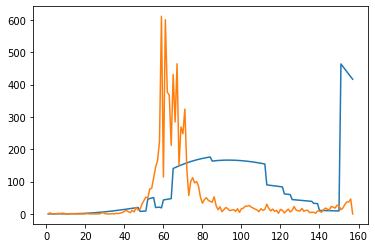

In [99]:
korea_dat = total_dat[total_dat['CountryCode']=='AUS']
predicted = res.predict(korea_dat)

plt.plot(korea_dat['Days'], predicted, '-')
plt.plot(korea_dat['Days'], korea_dat['DailyConfirmed'], '-')

In [102]:
mod = smf.gee("DailyConfirmed ~  Days + logDays + C1_Schoolclosing + C2_Workplaceclosing + C4_Restrictionsongatherings + C6_Stayathomerequirements + C8_Internationaltravelcontrols", "CountryCode", korea_dat , cov_struct = ind, family = fam)

In [103]:
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                  150
Model:                                 GEE   No. clusters:                        1
Method:                        Generalized   Min. cluster size:                 150
                      Estimating Equations   Max. cluster size:                 150
Family:                            Poisson   Mean cluster size:               150.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Wed, 01 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         15:09:26
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.0905   2.

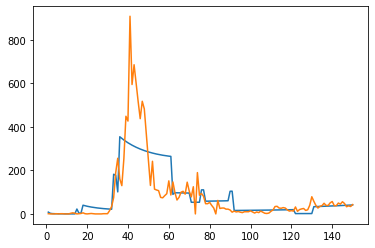

In [104]:
predicted = res.predict(korea_dat)
plt.plot(korea_dat['Days'], predicted, '-')
plt.plot(korea_dat['Days'], korea_dat['DailyConfirmed'], '-')